In [1]:
import numpy as np
from numba import autojit
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import sys
sys.path.insert(0, '/home/zglass/Documents/SpinorBECSimulation/FullQuantumFock')
from FockStateSimulation import fock_sim
from FockStateMinDep import fock_sim as fock_sim_np
from FockStateMinDep import fock_sim_fast as fock_sim_fast
import time

/home/zglass/miniconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
simulation_params = {
    'total_time': .02, #simulated time (s),
    'mag_time':0.1,
    'dt':0.05e-4, #simulation time step,
    'tauB' : 1e-3,
    'c':30*2*np.pi,
    'n_atoms':4000,
    'bf':np.complex(0,0.3357712)
    }

In [3]:
ts = time.time()
ans_3 = fock_sim_fast(**simulation_params)
te= time.time()
print(te-ts)

0.08044147491455078


/home/zglass/miniconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/zglass/miniconda3/lib/python3.5/site-packages/scipy/integrate/_ode.py:1015: ComplexWarning: Casting complex values to real discards the imaginary part
  tuple(self.call_args) + (f_params,)))


In [4]:
ts = time.time()
ans_2 = fock_sim_np(**simulation_params)
te= time.time()
print(te-ts)

5.327136039733887


In [5]:
ts = time.time()
ans_1 = fock_sim(**simulation_params)
te= time.time()
print(te-ts)

3.348750591278076


(array([  2.,   0.,   0.,   2.,   1.,   1.,   1.,   0.,   5.,   0.,   5.,
          3.,   7.,   5.,   5.,  14.,  12.,  32.,  12.,  12.,   8.,   2.,
          1.,   1.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([ -1.00044417e-11,  -9.44358665e-12,  -8.88273159e-12,
         -8.32187652e-12,  -7.76102146e-12,  -7.20016639e-12,
         -6.63931132e-12,  -6.07845626e-12,  -5.51760119e-12,
         -4.95674612e-12,  -4.39589106e-12,  -3.83503599e-12,
         -3.27418093e-12,  -2.71332586e-12,  -2.15247079e-12,
         -1.59161573e-12,  -1.03076066e-12,  -4.69905596e-13,
          9.09494702e-14,   6.51804536e-13,   1.21265960e-12,
          1.77351467e-12,   2.33436973e-12,   2.89522480e-12,
          3.45607987e-12,   4.01693493e-12,   4.57779000e-12,
          5.13864507e-12,   5.69950013e-12,   6.26035520e-12,
          6.82121026e-12]),
 <a list of 30 Patch objects>)

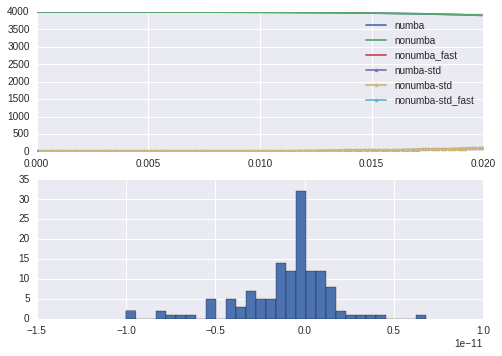

In [6]:
fig, ax = plt.subplots(2,1)
ax[0].plot(ans_1[0],ans_1[1], label = 'numba')
ax[0].plot(ans_2[0],ans_2[1], label='nonumba')
ax[0].plot(ans_3[0],ans_3[1], label='nonumba_fast')
ax[0].plot(ans_1[0],np.sqrt(ans_1[2]),'.-', label = 'numba-std')
ax[0].plot(ans_2[0],np.sqrt(ans_2[2]),'.-', label='nonumba-std')
ax[0].plot(ans_3[0],np.sqrt(ans_3[2]),'.-', label='nonumba-std_fast')

ax[0].legend()
ax[1].hist(ans_1[1]- ans_2[1],bins=30);
#plt.savefig('npvsnumbacompare.png')

In [8]:
print(len(ans_3[0]))
print(len(ans_2[0]))

1
134


In [10]:
from numpy.lib import scimath
def q_to_b(q):
    return scimath.sqrt(q/277)/(2*np.pi)
    

In [11]:
print(q_to_b(-5))

0.403056911175j


In [ ]:
0.33